In [ ]:
%pip install pandas numpy matplotlib
%pip install scikit-plot
%pip install ydata-profiling
%pip install -U scikit-learn
%pip install seaborn
%pip install ipywidgets
%pip install seaborn
%matplotlib inline

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=db2ef67e6dc0d0da177ec39a443fa9de918c669d2c732d3eb74f12265b516523
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 45.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Using cached jed

In [ ]:
import matplotlib
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

# Seccion 1. Entendimiento del negocio y enfoque analitico

|||
|-|-|
| **Oportunidad/problema Negocio**  | El problema de negocio se basa en como relacionar las opiniones de los ciudadanos con los ODS 3 (Salud y bienestar), 4 (Educación y calidad) y 5 (Igualdad de género).|
| **Objetivos y criterios de éxito desde el punto de vista del negocio** | • Objetivo: Implementar una solución que de manera automática relacione las opiniones de los ciudadanos con los ODS 3, 4 y 5.  • Criterios de éxito: |
| **Organización y rol dentro de ella que se beneficia con la oportunidad definida** | El Fondo de Poblaciones de las Naciones Unidas (UNFPA) y otras entidades públicas se beneficiarían con la oportunidad planteada ya que a través de esta podrán evaluar soluciones a problemas actuales de manera eficiente y de bajo costo. |
| **Impacto que puede tener en Colombia este proyecto** | Este proyecto puede tener un impacto en Colombia ya que a través del proyecto implementado se logrará dar respuestas a problemas en el ámbito colombiano de manera eficiente, de bajo costo y con una efectividad mayor. |
| **Enfoque analítico. Descripción de la categoría de análisis (descriptivo, predictivo, etc.), tipo y tarea de aprendizaje e incluya las técnicas y algoritmos que propone utilizar.** | • Descripción de la categoría de análisis: la categoría del análisis es meramente predictiva ya que se busca pronosticar a qué ODS están relacionadas las opiniones de los ciudadanos.  • Tipo y tarea de aprendizaje: El aprendizaje es supervisado ya que se le proveerá al modelo etiquetas sobre las ODS que tiene cada opinión de los ciudadanos.  • Técnicas y algoritmos: |

# Sección 2. Entendimiento y preparación de los datos

# 2.1 Carga de datos


In [ ]:
df = pd.read_excel('ODScat_345.xlsx')


# 2.2. Entendimiento de datos

In [ ]:
profile = ProfileReport(df, title="Reporte de Perfilamiento", explorative=True)
profile.to_notebook_iframe()
profile.to_file("entendimientoDatos.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.shape

(4049, 2)

In [ ]:
# Mostrar datos
df.head()

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas ...",3
1,"En 2007, el gobierno central financió directam...",3
2,"Claramente, hay muchos otros factores en juego...",3
3,"Por ejemplo, el estado australiano de Victoria...",3
4,"El consumo anual de alcohol se estima en 15,7 ...",3


Acá de aprecia que las dos columnas que tenemos en el set son: "Textos_espanol" representa las opiniones de los ciudadanos, y "sdg" que representa el ODS al que está asignada la opinion

In [ ]:
# Tipos de las variables
df.dtypes

,0
Textos_espanol,object
sdg,int64


El tipo de dato de la columna "Textos_espanol" no está en el formato correcto. Mas adelante se tiene que cambiar el tipo a string.

### Variables numéricas

In [ ]:
# Realizar el prefilamiento de los datos. Generar descripción para columnas numéricas
df.describe()

,sdg
count,4049.000000
mean,4.051124
std,0.814338
min,3.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


El rango de valores de la columna "sdg" es correcto ya los valores se encuentran entre 3 y 5

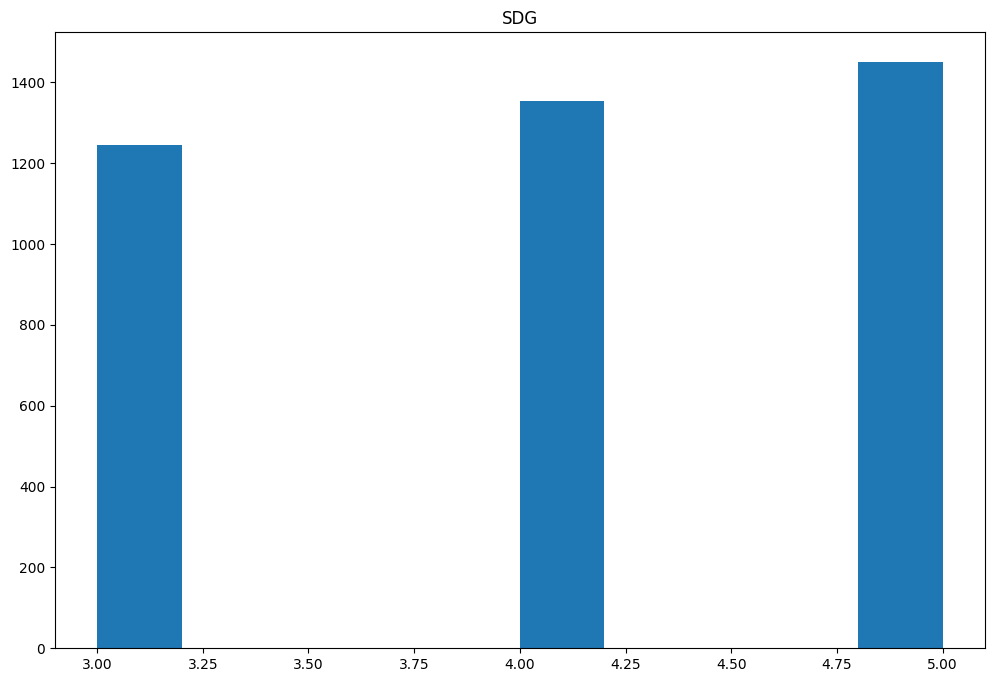

In [ ]:
plt.figure(figsize = (12, 8))
plt.hist(df['sdg'], bins = 10)
plt.title('SDG')
plt.show()

In [ ]:
# Nos aseguramos que los valores dados sean 3, 4 o 5.
df.value_counts(df["sdg"])

,count
sdg,
5,1451
4,1354
3,1244


### Variables de texto

Para la columna de Textos_espanol es posible identificar que las palábras mas comunes dentro de las opiniones no tienen un impacto ya que pueden ser articulos, conectores, etc

In [ ]:
# Se observa que no hay ausencias en los datos
df.isnull().sum()

,0
Textos_espanol,0
sdg,0


### **Observaciones de los datos**
En esta seccion se logra perfilar las filas de los datos seleccionados con ProfileReport. En general, se puede evidenciar como la unica columna de texto, son en promedio parrafos de 1000 palabras que contienen la descripcion general de  la información dada por los ciudadanos acerca de los objetivos de desarrollo sostenible.

Otro punto importante a analizar, es que hay muchos signos de puntuacion.Asi mismo, hay uso de tildes y acentos para ciertas palabras, lo que en un futuro nos puede generar ruido en los datos. Igualemnte se evidencia como la gran mayoria de palabras leidas, son conectores y articulos, cosa que al igual que los acentos y las tildes, **toca quitar en la preparacion con una lematiazion**.

# 2.3 Preparación de los datos

Se ejecutan los pasos de los criterios de calidad de los datos: completitud, unicidad, validez y consistencia

In [ ]:
df_p = df.copy()

## Completitud

Como vimos anteriormente no hay datos ausentes

## Unicidad

In [ ]:
df_p.loc[df_p.duplicated(keep = False)].head(6)

,Textos_espanol,sdg


In [ ]:
df_p.duplicated(keep = False).sum()

0

No hay filas repetidas

## Consistencia

Como dijimos anteriormente se debe cambiar el tipo de dato de la columna Textos_espanol de object a string

In [ ]:
df_p["Textos_espanol"] = df["Textos_espanol"].astype("string")

In [ ]:
df_p.dtypes

,0
Textos_espanol,string[python]
sdg,int64


In [ ]:
df_p.sample(5)

,Textos_espanol,sdg
1384,Las experiencias de los estudiantes en clase d...,4
1803,"En 2009, el 85% de los graduados de la escuela...",4
3854,Las mujeres rurales corren el riesgo de sufrir...,5
2902,"Paralelamente, su nivel medio de educación ha ...",5
486,Los intentos de planificación entre gobiernos ...,3


## Validez

Anteriormente se revisó que los valores para la columna "sdg" fueran 3, 4 o 5

# 2.4 Procesamiento de texto

Luego de preparar evaluar la calidad de los datos se procede con el pre-procesamiento de texto de la columna de Textos_espanol para luego poder poder usarlo en los modelos escogidos

Para hacer esto se pasan por tres etapas:
- Limpieza de los datos
- Tokenización
- Normalización

En cada seccion podra ver la explicacion de cada una de las etapas a mas profundidad.

In [ ]:
%pip install contractions
%pip install inflect
%pip install nltk
%pip install spacy
!python -m spacy download es_core_news_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 81.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import nltk
import spacy
nltk.download('punkt')
nltk.download('punkt_tab')
nlp = spacy.load('es_core_news_sm')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
import re, string, unicodedata


## Limpieza de los datos de texto

El siguinete codigo aplica varias técnicas de limpieza de datos:

1. Convierte todas las palabras a minúsculas
2. Elimina caracteres no ASCII.
3. Elimina signos de puntuación y remueve palabras irrelevantes (stopwords).

Estas transformaciones son esenciales para normalizar y simplificar el texto, lo que ayuda a mejorar la precisión de algoritmos de clasificación como Naive Bayes, KNN y SVM. Al reducir el ruido y estandarizar los datos, los modelos pueden fijarse mas facilmente en patrones relevantes, mejorando así su capacidad para clasificar de manera más eficiente y precisa.

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('spanish'):
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

## Tokenización

La motivacion principal de tokenizar, es poder procesar todas las palabras del dataset por separado con el algorimo antes descrito. La Tokenizacion nos ayuda a atomizar las frases a nivel de palabra y poder corregir cada una de ellas para un mejor entendimiento en futuros modelos.

In [ ]:
df_t = df_p.copy()

Primero se corrigen las contracciones que pueden estar disponibles en las opiniones

In [ ]:
df_t["Textos_espanol"] = df_t["Textos_espanol"].apply(contractions.fix)

In [ ]:
df_t.sample(5)

,Textos_espanol,sdg
36,"Sin embargo, el establecimiento de un sistema ...",3
1665,Para lograr mejoras reales en la enseñanza y e...,4
3675,Esta brecha de información conducirá a opcione...,3
2152,Un análisis descriptivo básico de datos involu...,5
769,"Como se muestra, la población islandesa ha exp...",3


Luego se realiza la tokenización de las palabras en una nueva columna

In [ ]:
df_t["palabras"] = df_t["Textos_espanol"].apply(word_tokenize)

In [ ]:
df_t.sample(5)

,Textos_espanol,sdg,palabras
2509,La igualdad de género en el parlamento también...,5,"[La, igualdad, de, género, en, el, parlamento,..."
1861,"Además, la competencia de un estudiante, en sí...",4,"[Además, ,, la, competencia, de, un, estudiant..."
1096,También analizan qué aspectos de la calidad do...,4,"[También, analizan, qué, aspectos, de, la, cal..."
2173,La evidencia sugiere que la representación de ...,5,"[La, evidencia, sugiere, que, la, representaci..."
1639,Estos estándares tendrían que alinearse con el...,4,"[Estos, estándares, tendrían, que, alinearse, ..."


In [ ]:
df_t.shape

(4049, 3)

In [ ]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
 2   palabras        4049 non-null   object
dtypes: int64(1), object(2)
memory usage: 95.0+ KB


Se ve que no hay inconsistencias ni anomalias en los datos luego de la tokenización

Luego de esto se realiza el pre-procesamiento donde se elimina el ruido

In [ ]:
df_t["palabras_preprocesadas"] = df_t["palabras"].apply(preprocessing)

In [ ]:
df_t = df_t.drop(columns=["Textos_espanol","palabras"], axis=1)

In [ ]:
df_t.head(20)

,sdg,palabras_preprocesadas
0,3,"[ejemplo, naomero, consultas, externas, especi..."
1,3,"[2007, gobierno, central, financio, directamen..."
2,3,"[claramente, factores, juego, particular, vari..."
3,3,"[ejemplo, australiano, victoria, creo, agencia..."
4,3,"[consumo, anual, alcohol, estima, 157, litros,..."
5,3,"[probar, pronto, medicina, rural, puede, crear..."
6,3,"[duracion, media, estancia, hospital, alos, ut..."
7,3,"[periodo, retrospectivo, 20, anos, 1951, 2001,..."
8,3,"[estan, vinculando, datos, registros, incluido..."
9,3,"[forma, eficaz, mejorar, eficacia, calidad, se..."


## Normalización

Ahora se eliminan los prefijos y sufijos y tambien se realiza una lematización transformando los verbos a su forma base (como "corriendo" a "correr") usando WordNetLemmatizer. Esto se hace solo para los verbos.

La motivacion principal de Lemmatizar, es que este proceso reduce las variaciones de palabras, mejorando la consistencia de los datos y ayudando a los algoritmos de clasificación como Naive Bayes, KNN y SVM a identificar patrones significativos. Es crucial para **aumentar la eficiencia y precisión del modelo**, ya que se r**educe la cantidad de palabras diferentes que representan la misma idea**, mejorando así la clasificacion y el rendimiento del modelo.

In [ ]:
df_n = df_t.copy()

In [ ]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

In [ ]:
df_n = df_n.rename(columns={"palabras_preprocesadas":"palabras"})

In [ ]:
df_n["palabras"] = df_n["palabras"].apply(stem_and_lemmatize)

In [ ]:
df_n.head()

,sdg,palabras
0,3,"[ejemplo, naomero, consultas, externas, especi..."
1,3,"[2007, gobierno, central, financio, directamen..."
2,3,"[claramente, factor, juego, particular, varied..."
3,3,"[ejemplo, australiano, victoria, creo, agencia..."
4,3,"[consumo, anual, alcohol, estima, 157, litros,..."


## Selección de campos

Esta funcion del prcesamiento, solo se encarga de devolver la tokenizacion a texto plano de nuevo.

In [ ]:
df_n["palabras"] = df_n["palabras"].apply(lambda x: " ".join(map(str, x)))

In [ ]:
df_n = df_n.rename(columns={"palabras":"Textos_espanol"})

In [ ]:
df_n["Textos_espanol"].head(50)

,Textos_espanol
0,ejemplo naomero consultas externas especialist...
1,2007 gobierno central financio directamente so...
2,claramente factor juego particular variedad ba...
3,ejemplo australiano victoria creo agencia prom...
4,consumo anual alcohol estima 157 litros ano ho...
5,probar pronto medicina rural puede crear deseo...
6,duracion media estancia hospital alos utiliza ...
7,periodo retrospectivo 20 anos 1951 2001 precio...
8,estan vinculando datos registros incluidos rel...
9,forma eficaz mejorar eficacia calidad servicio...


In [ ]:
profile = ProfileReport(df_n, title="Reporte de Perfilamiento - Procesamiento Texto", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# División de los datos en entrenamiento y prueba antes de aplicar TF-IDF
X_train, X_test, y_train, y_test = train_test_split(
    df_n["Textos_espanol"],
    df_n['sdg'],
    test_size=0.3,
    random_state=42
)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=4000)

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [ ]:
# Transform en el conjunto de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
df_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


# Sección 3. Modelado y evaluacion

Teniendo en cuenta la exhaustiva limpieza de datos y la vectorización TF-IDF realizada, optamos por implementar tres algoritmos distintos para evaluar el modelo con el fin de cumplir el objetivo del negocio. Para tratar de cumplir los objetivos de negocio, opramos por la selección de los algoritmos Naive Bayes, K-Nearest Neighbors (KNN) y Support Vector Machines (SVM), ya que son algoritmos que logran clasificar textos segun categorias dadas. Miremos mas a fondo por que nos podria ayudar cada uno de ellos:

* **Naive Bayes** es ideal para procesar rápidamente grandes volúmenes de datos textuales, lo que lo convierte en una opción eficaz para la fase inicial del proyecto. Su simplicidad y rapidez lo hacen adecuado para obtener resultados inmediatos.

* **KNN**, por su parte, aunque es más costoso en términos computacionales, puede ser útil en escenarios donde se busca capturar similitudes claras entre textos, en este caso para detectar los niveles de ODS. Esto lo convierte en una opción valiosa para comparar la capacidad de los modelos de encontrar patrones cercanos entre el lenguaje natural de los ciudadanos.

* **SVM** ofrece una mayor precisión al manejar problemas con datos de alta dimensionalidad, como es el caso de la clasificación de texto. Si bien su entrenamiento es más lento, su capacidad para identificar patrones más complejos puede mejorar la precisión de la clasificación de las opiniones de los ciudadanos en relación con los ODS.


# 3.1 Seleccion de algoritmo

Luego de tener las palabras más frecuentes como columnas independientes, se procede a realizar el modelo con cada algoritmo escogidos.

## 3.1.1 K-Nearest Neighbors - Juan Camilo López

KNN es un algoritmo que se basa en la proximidad de los datos. Este busca los K vecinos mas cercanos de los datos, y los clasifica segun la clase mayoritaria entre los vecinos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
x_train_knn = df_train_tfidf
x_test_knn = df_test_tfidf

y_train_knn = y_train.reset_index(drop=True)
y_test_knn = y_test.reset_index(drop=True)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn.predict(x_test_knn)

In [ ]:
print(classification_report(y_test_knn, y_pred_knn))
print("Exactitud sobre la validacion: %.2f", accuracy_score(y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

           3       0.93      0.94      0.94       372
           4       0.94      0.96      0.95       402
           5       0.94      0.93      0.93       441

    accuracy                           0.94      1215
   macro avg       0.94      0.94      0.94      1215
weighted avg       0.94      0.94      0.94      1215

Exactitud sobre la validacion: %.2f 0.939917695473251


Se ve que los valores de cada métrica son muy altos, lo que nos dice que el modelo es adecuado

Sin embargo, usaremos K-Fold Cross Validation y GridSearch para encontrar el mejor valor de n_neighbors

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [ ]:
particiones = KFold(n_splits=10,shuffle=True,random_state=0)

In [ ]:
param_grid = {"n_neighbors":range(1,20)}

In [ ]:
knn_2 = KNeighborsClassifier()

mejor_modelo = GridSearchCV(knn_2, param_grid, cv=particiones)
mejor_modelo.fit(x_train_knn, y_train_knn)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)})

In [ ]:
mejor_modelo.best_params_

{'n_neighbors': 14}

In [ ]:
knn_final = mejor_modelo.best_estimator_

y_pred_knn_final = knn_final.predict(x_train_knn)
y_pred_test_knn_final = knn_final.predict(x_test_knn)
print(classification_report(y_test_knn, y_pred_test_knn_final))

              precision    recall  f1-score   support

           3       0.97      0.96      0.96       372
           4       0.96      0.97      0.97       402
           5       0.97      0.97      0.97       441

    accuracy                           0.97      1215
   macro avg       0.97      0.97      0.97      1215
weighted avg       0.97      0.97      0.97      1215



De acuerdo con el algoritmo de GridSearch, el mejor valor para n_neighbors es de 14, lo cual al aplicarlo al modelo de KNN nos muestra metricas mucho mejores que el modelo anterior

### Métricas de evaluación

Ahora vamos a analizar los resultados

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_knn, y_pred_test_knn_final)

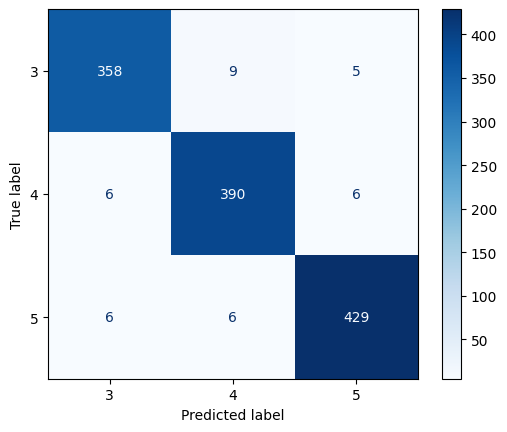

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_final.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [ ]:
print("Exactitud sobre entrenamiento: %.2f" % accuracy_score(y_train_knn, y_pred_knn_final))
print("Exactitud sobre la validacion: %.2f" % accuracy_score(y_test_knn, y_pred_test_knn_final))
f1_knnw = f1_score(y_test_knn, y_pred_test_knn_final, average='weighted')
print(f"F1 weighted Score para KNN: {f1_knnw}")
f1_knnm = f1_score(y_test_knn, y_pred_test_knn_final, average='macro')
print(f"F1 macro Score para KNN: {f1_knnm}")

Exactitud sobre entrenamiento: 0.97
Exactitud sobre la validacion: 0.97
F1 weighted Score para KNN: 0.968726001723351
F1 macro Score para KNN: 0.9684652075757404


## 3.1.2 SVM - Johan Alexis Bautista Quinayas

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [ ]:
x_train_svm = df_train_tfidf
x_test_svm = df_test_tfidf

y_train_svm = y_train.reset_index(drop=True)
y_test_svm = y_test.reset_index(drop=True)

Hacemos 10 particiones del dataset, para poder hacer la evaluación del mejor modelo. Esto evita que el modelo dependa de una sola división entre entrenamiento y test, ayudando a encontrar los mejores hiperparámetros y mejorando la generalización del modelo.

In [ ]:
particiones_SVG = KFold(n_splits=10, shuffle=True, random_state=0)

El hiperparametro más importante para ajustar en SVG es el C: parámetro de regularización, en este sentido inicialmente con un rango amplío (0..100) y luego se va acotando a los valores con mejor desempeño (únicamente se incluye el rango (0.4..0.7) para no aumentar el número de iteraciones, pero estos fueron elegidos por ser los valores con mejor desempeño de iteraciones anteriores).

In [ ]:
svc_model = SVC()

param_grid = {
    'C': [0.4, 0.5, 0.6, 0.7],
    'kernel': ['linear']
}

### Métricas de evaluación

La metrica que elegimos para evaluar los modelos es Accuracy, debido a que no existen objetivos especificos del negocio para elegir otra métrica (por ej: que fuese muy necesario clasificar con presición una clase) por esto se opta por intentar maximizar globalmente el número de aciertos.

In [ ]:
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid,
                           scoring='accuracy', cv=particiones_SVG, verbose=2, n_jobs=-1)

grid_search.fit(x_train_svm, y_train_svm)
print("Mejores parámetros encontrados:", grid_search.best_params_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Mejores parámetros encontrados: {'C': 0.6, 'kernel': 'linear'}


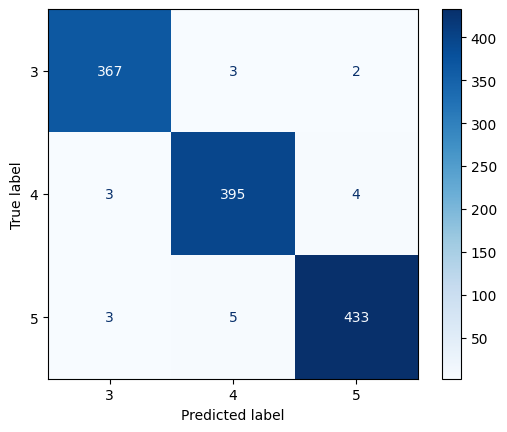

In [ ]:
best_svc_model = grid_search.best_estimator_
y_pred_svm = best_svc_model.predict(x_test_svm)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_svm, y_pred_svm), display_labels=best_svc_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test_svm, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))
f1_SVMw = f1_score(y_test_svm, y_pred_svm, average='weighted')
print(f"F1 weighted Score para SVM: {f1_SVMw}")
f1_SVMm = f1_score(y_test_svm, y_pred_svm, average='macro')
print(f"F1 macro Score para SVM: {f1_SVMm}")


Classification Report:
              precision    recall  f1-score   support

           3       0.98      0.99      0.99       372
           4       0.98      0.98      0.98       402
           5       0.99      0.98      0.98       441

    accuracy                           0.98      1215
   macro avg       0.98      0.98      0.98      1215
weighted avg       0.98      0.98      0.98      1215

Accuracy: 0.9835390946502057
F1 weighted Score para SVM: 0.9835397450449489
F1 macro Score para SVM: 0.9835640893490325


## 3.1.3 Multimode Naive Bayes - Danny Camilo Muñoz


El algoritmo Multinomial Naive Bayes (MNB), es un algoritmo de clasificacion de textos que se destaca principalmente por ser simple de implementar, rapido en ejecucion  y  menos costoso en comparación con otros algoritmos como Support Vectorpara datsets que son muy grandes. La razon de su rapidez, es por como calcula y clasifica la probabilidad de que dado un texto, lo clasifique en alguna clase. Ademas, este algoritmo encaja perfecto con la vectorizacion de palabras TFIDF calculada anteriormente, por lo que nos simplifica aun mas los calculos.

Dado que tenemos una gran cantidad de texto en lenguaje natural (como el texto de los ciudadanos), la rapidez de Naive Bayes permite procesar grandes volúmenes de datos de manera eficiente y a bajo costo, logrando cumplir los objetivos del negocio.

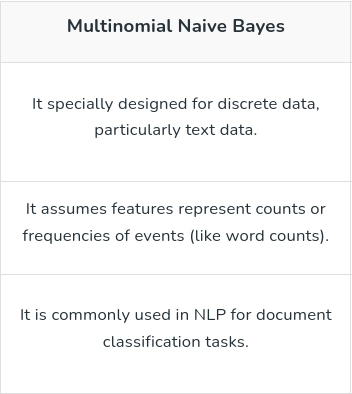

Tomado de: https://www.geeksforgeeks.org/multinomial-naive-bayes/

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


En este punto, simplemente tenemos que dividir el dataset en entrenamiento y prueba. Igualmente, es importante destacar que MNB no necesita de muchos datos de entrenamiento para poder perfeccionarse, otro punto positivo para este algoritmo.

In [ ]:
x_train_MNB = df_train_tfidf
x_test_MNB = df_test_tfidf

y_train_MNB = y_train.reset_index(drop=True)
y_test_MNB = y_test.reset_index(drop=True)

Luego de dividir los datos, entrenamos el modelo con x_train. Notese que no necesitamos usar K-Fold o algoritmos de perfeccionamiento de hiperparametros, ya que MNB no tiene hiperparametros que modifiquen mucho la funcionalidad del algoritmo. Generalmente, los hiperparametros que estan por default, funcionan muy bien para la construccion del algoritmo.

In [ ]:
model = MultinomialNB()
model.fit(x_train_MNB, y_train_MNB)
y_pred_MNB = model.predict(x_test_MNB)



[3 4 5]


### Métricas de evaluación

Al igual que los modelos anteriores, buscamos comparar las metricas por accuracy. Por ello, se presenta la siguiente matriz de confusion que nos permite calcular mas facilmente el accuracy y las demas metricas para algoritmos de clasificacion.

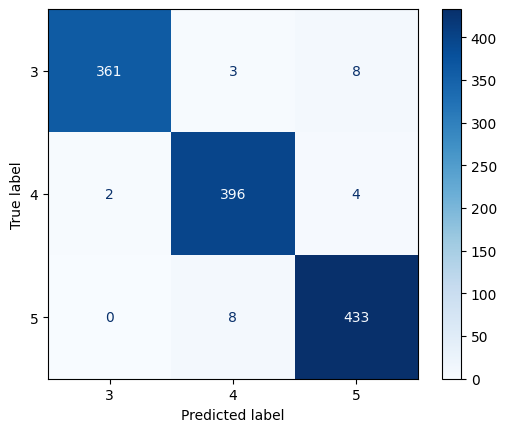

In [ ]:
dispNB = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_MNB, y_pred_MNB), display_labels=["3","4","5"])
dispNB.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print("Accuracy:", accuracy_score(y_test_MNB, y_pred_MNB))
print("Classification Report:\n", classification_report(y_test_MNB, y_pred_MNB))
f1_NB = f1_score(y_test_MNB, y_pred_MNB, average='weighted')
print(f"F1 weighted Score para MNB: {f1_NB}")
f1_NBm = f1_score(y_test_MNB, y_pred_MNB, average='macro')
print(f"F1 macro Score para MNB: {f1_NBm}")

Accuracy: 0.9794238683127572
Classification Report:
               precision    recall  f1-score   support

           3       0.99      0.97      0.98       372
           4       0.97      0.99      0.98       402
           5       0.97      0.98      0.98       441

    accuracy                           0.98      1215
   macro avg       0.98      0.98      0.98      1215
weighted avg       0.98      0.98      0.98      1215

F1 weighted Score para MNB: 0.9794387562820669
F1 macro Score para MNB: 0.9795753215685141


## 3.2 Algoritmo seleccionado: SVM

Después de evaluar tres algoritmos distintos (KNN, Naive Bayes y SVM), hemos seleccionado **Support Vector Machine (SVM)** como el algoritmo más adecuado para cumplir con los objetivos de clasificación de textos, específicamente la categorización de opiniones de ciudadanos en los Objetivos de Desarrollo Sostenible (ODS).

El rendimiento de los algoritmos se evaluó utilizando la métrica de accuracy y la métrica F1-Score, lo que permitió comparar la efectividad de cada modelo en general y para clases específicas. El SVM fue el que logró el mejor rendimiento en ambos aspectos:

* **Accuracy**: El **SVM** logró una precisión de clasificación del **98,3%**, lo que indica que el **98%** de las predicciones del modelo fueron correctas. Este valor supera a **KNN (97%)** y **Naive Bayes (97.9%)**. Aunque la diferencia puede parecer pequeña, el SVM se destacó en términos de consistencia en la generalización de los datos.
* **F1-Score:** El F1-Score ponderado para el **SVM** fue de **0.983** en comparación con **0.968 en KNN** y **0.979 en Naive Bayes.** Esto refleja un buen equilibrio entre la precisión y el recall, lo que asegura que el modelo clasifique correctamente las categorías de manera uniforme y sin sesgos significativos hacia alguna clase específica.

Adicionalmente, también consideramos la robustez ante datos de alta dimensionalidad: ya que la clasificación de textos basados en TF-IDF tiende a producir conjuntos de datos de alta dimensionalidad, porque las palabras y sus frecuencias crean una gran cantidad de
columnas. **SVM** es particularmente adecuado para manejar este tipo de datos con alta dimensionalidad, ya que tiene una capacidad para encontrar los hiperplanos óptimos que separan las clases de manera eficaz, **incluso cuando el número de características es elevado**.

Por supuesto, el K-Fold Cross-Validation mostró que con 10 folds aleatorios, el SVM mantiene su rendimiento, lo que confirma que el modelo generaliza bien y no depende de una división específica de entrenamiento y test.

##3.3 Analisis de palabras ODS

In [ ]:
df_analysis_train_tfidf = df_train_tfidf.copy()
df_analysis_train_tfidf['sdg'] = y_train.values

In [ ]:
mean_tfidf_by_sdg = df_analysis_train_tfidf.groupby('sdg').mean()

for sdg in mean_tfidf_by_sdg.index:
    print(f"Palabras más representativas para ODS {sdg}:")
    sorted_words = mean_tfidf_by_sdg.loc[sdg].sort_values(ascending=False)[:10]
    print(sorted_words)
    print("\n")

Palabras más representativas para ODS 3:
salud           0.075998
atencion        0.061259
servicios       0.035685
mas             0.031276
mental          0.028032
pacientes       0.027814
enfermedades    0.024120
medicos         0.021997
primaria        0.021787
paises          0.021707
Name: 3, dtype: float64


Palabras más representativas para ODS 4:
educacion      0.058900
estudiantes    0.050971
escuelas       0.044556
aprendizaje    0.035751
mas            0.030255
docentes       0.029684
alumnos        0.027585
evaluacion     0.027199
escuela        0.026865
superior       0.023842
Name: 4, dtype: float64


Palabras más representativas para ODS 5:
mujeres      0.108726
genero       0.068199
hombres      0.037930
mas          0.030475
igualdad     0.029956
trabajo      0.026041
derechos     0.025827
violencia    0.024481
paises       0.022091
mujer        0.020434
Name: 5, dtype: float64




A continuación se enumeran las palabras más representativas por cada clase y que inciden en los diferentes modelos empleados:

#####**ODS 3: Salud y Bienestar**
Palabras clave: salud, atención, servicios, mental, pacientes, enfermedades, médicos, primaria, países

#####**ODS 4: Educación de Calidad**
Palabras clave: educación, estudiantes, escuelas, aprendizaje, docentes, alumnos, evaluación, superior

#####**ODS 5: Igualdad de Género**
Palabras clave: mujeres, género, hombres, igualdad, trabajo, derechos, violencia, mujer

#### Recomendaciones basadas en las palabras más representativas:

In [ ]:
from wordcloud import WordCloud

In [ ]:
def plot_wordcloud_for_sdg(sdg, top_words, num_words=10):
    top_words = top_words.sort_values(ascending=False)[:num_words]
    word_freq = {word: score for word, score in zip(top_words.index, top_words.values)}
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de palabras más representativas para ODS {sdg}')
    plt.show()

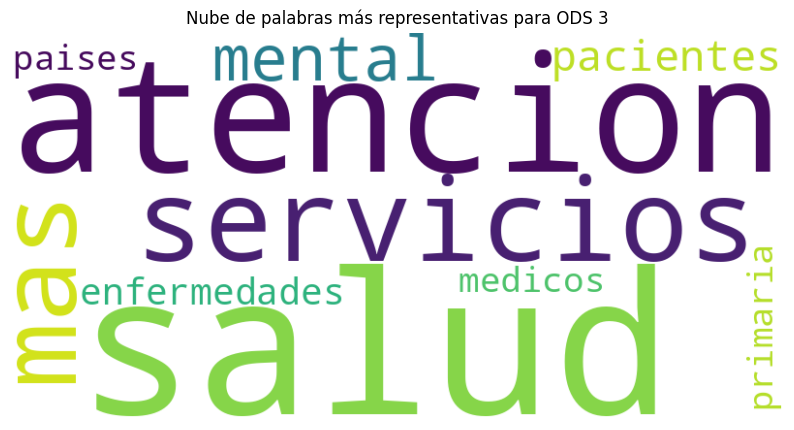

In [ ]:
top_words_ods_3 = mean_tfidf_by_sdg.loc[3].sort_values(ascending=False)
plot_wordcloud_for_sdg(3, top_words_ods_3)

**ODS 3: Salud y Bienestar.**

Las palabras más representativas para este objetivo incluyen "**salud**", "**atencion**", "**servicios**", "**mental**", "**pacientes**", "**enfermedades**", y "**medicos**". Esto sugiere que las opiniones relacionadas están muy centradas en el acceso y la calidad de los servicios de salud, con un énfasis particular en la salud mental y la atención primaria.

Se dan las siguientes recomendaciones a la organización:

* **Mejorar los servicios de atención primaria**: Las menciones de "**primaria**" y "**atencion**" indican una necesidad crítica de mejorar el acceso y calidad de la atención básica de salud.
* **Fortalecer los programas de salud mental:** La alta presencia de "**mental**" sugiere que este es un tema que debe recibir mayor atención. Implementar programas de salud mental en áreas subatendidas podría mejorar el bienestar general.
* **Capacitación de personal médico:** La mención de "**médicos**" indica la necesidad percibida de mejorar la capacitación y/o aumentar el número de profesionales de la salud disponibles. Por ello, es recomendable incrementar la formación y disponibilidad de médicos.

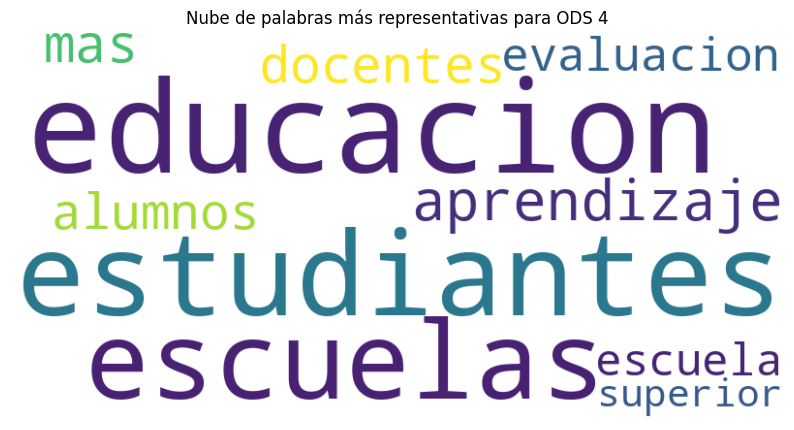

In [ ]:
top_words_ods_4 = mean_tfidf_by_sdg.loc[4].sort_values(ascending=False)
plot_wordcloud_for_sdg(4, top_words_ods_4)

**ODS 4:** **Educación de Calidad**

Las palabras clave para este ODS incluyen "**educacion**", "**estudiantes**", "**escuelas**", "**aprendizaje**", "**docentes**", y "**alumnos**". Aquí, los temas se enfocan en el sistema educativo, con un énfasis en la evaluación del aprendizaje y el papel de los docentes.

Se dan las siguientes recomendaciones en este rubro a la organización:

* **Mejorar la calidad de la educación en las escuelas:** Los términos "**escuelas**" y "**docentes**" sugieren la necesidad de fortalecer la infraestructura educativa y la formación del personal docente.
* **Implementar evaluaciones más eficaces**: "**Evaluacion**" aparece entre las palabras más representativas, indicando que es importante mejorar los métodos de evaluación del aprendizaje o de evaluación al **personal educativo**.
* **Promover el acceso a la educación superior:** El énfasis en "**superior**" muestra que la educación superior es importante, y en este sentido debe estar disponible y mejor estructurada para garantizar el acceso a oportunidades.


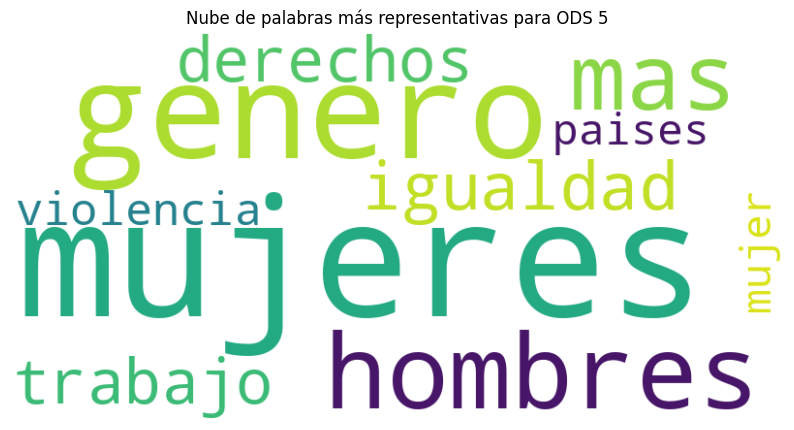

In [ ]:
top_words_ods_5 = mean_tfidf_by_sdg.loc[5].sort_values(ascending=False)
plot_wordcloud_for_sdg(5, top_words_ods_5)

**ODS 5: Igualdad de Género**

Las palabras más representativas incluyen "**mujeres**", "**genero**", "**hombres**", "**igualdad**", "trabajo", "**derechos**", y "violencia". El enfoque aquí está claramente en la igualdad de género, los derechos de las mujeres, y la violencia de género.

Se dan las siguientes recomendaciones en este rubro a la organización:

* **Desarrollar políticas de igualdad en el trabajo:** Las menciones de "**trabajo**" y "**igualdad**" sugieren que las organizaciones deben garantizar condiciones equitativas para mujeres y hombres en el ámbito laboral.
* **Combatir la violencia de género:** La alta frecuencia de "**violencia**" y "**derechos**" indica una preocupación sobre este problema. Se debe implementar políticas firmes para prevenir la violencia de género y promover los derechos de las mujeres.


# Sección 4. Resultados

## 4.1 K-Nearest Neighbors - Juan Camilo López

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

cm = confusion_matrix(y_test_knn, y_pred_test_knn_final)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_final.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [ ]:
print("Exactitud sobre la validacion: %.2f" % accuracy_score(y_test_knn, y_pred_test_knn_final))

## 4.2 SVG - Johan Alexis Bautista Quinayas

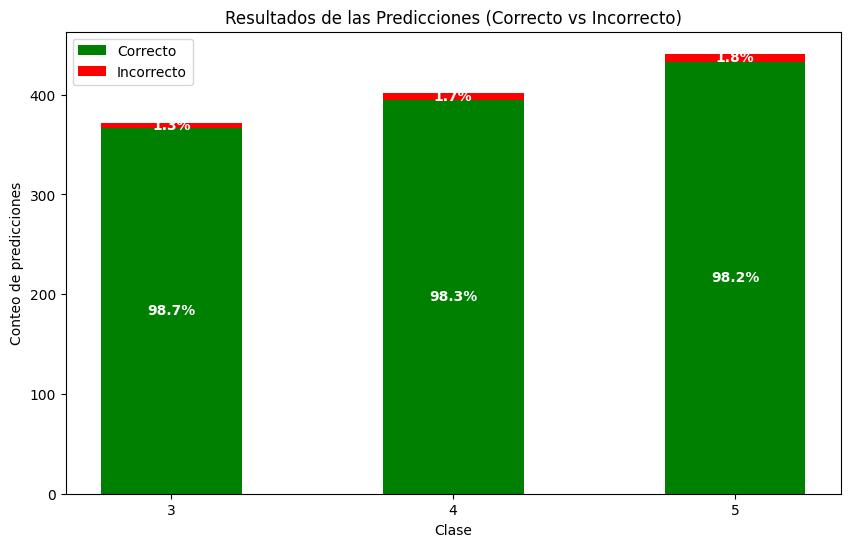

In [ ]:
pred_correct = (y_pred_svm == y_test_svm)
pred_incorrect = (y_pred_svm != y_test_svm)

classes = np.unique(y_test_svm)

correct_counts = []
incorrect_counts = []

for class_value in classes:
    correct_counts.append(np.sum((y_test_svm == class_value) & pred_correct))
    incorrect_counts.append(np.sum((y_test_svm == class_value) & pred_incorrect))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.5
indices = np.arange(len(classes))

bars1 = ax.bar(indices, correct_counts, bar_width, label='Correcto', color='g')
bars2 = ax.bar(indices, incorrect_counts, bar_width, bottom=correct_counts, label='Incorrecto', color='r')

ax.set_xlabel('Clase')
ax.set_ylabel('Conteo de predicciones')
ax.set_title('Resultados de las Predicciones (Correcto vs Incorrecto)')
ax.set_xticks(indices)
ax.set_xticklabels(labels=["3", "4", "5"])
ax.legend()

for i in range(len(classes)):
    total = correct_counts[i] + incorrect_counts[i]
    if total > 0:
        correct_pct = (correct_counts[i] / total) * 100
        incorrect_pct = (incorrect_counts[i] / total) * 100

        ax.text(indices[i], correct_counts[i] / 2, f'{correct_pct:.1f}%',
                ha='center', va='center', color='white', fontweight='bold')

        ax.text(indices[i], correct_counts[i] + incorrect_counts[i] / 2,
                f'{incorrect_pct:.1f}%', ha='center', va='center', color='white', fontweight='bold')

plt.show()


Exactitud del Modelo

**Clase 3: Correcto 98.7% - Incorrecto 1.3%**

El modelo clasifica de manera casi perfecta las opiniones asignadas a esta clase. Un porcentaje de error de solo 1.3%.

**Clase 4: correcto: 98.3% - incorrecto: 1.7%**

Aunque presenta un ligero aumento en los errores (1.7%), el modelo sigue siendo altamente preciso. Este resultado confirma que el modelo es **capaz de generalizar bien** los datos de entrenamiento y manejar la variabilidad del lenguaje asociado al ODS 4.

**Clase 5: correcto: 98.2% - incorrecto: 1.8%**

A pesar de ser la clase con el mayor porcentaje de error, el 98.2% de predicciones correctas demuestra que el **modelo sigue siendo fiable**. La diferencia en los errores entre las clases es marginal, es decir que el SVM tiene un buen desempeño en general.

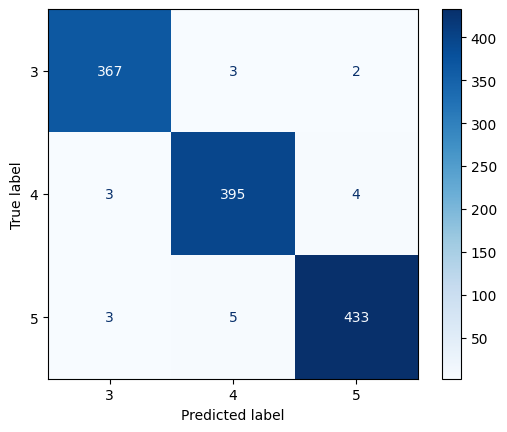

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_svm, y_pred_svm), display_labels=best_svc_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

La matriz de confusion nos confirma el comportamiento anterior, hay un excelente rendimiento en la clasificación de textos, con una alta precisión en todas las clases: 367, 395 y 433 predicciones correctas para las clases 3, 4 y 5, respectivamente. Los errores de clasificación son mínimos. Esto demuestra que el modelo separa eficazmente las clases.

In [ ]:
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))
f1_SVMw = f1_score(y_test_svm, y_pred_svm, average='weighted')
print(f"F1 weighted Score para SVM: {f1_SVMw}")
f1_SVMm = f1_score(y_test_svm, y_pred_svm, average='macro')
print(f"F1 macro Score para SVM: {f1_SVMm}")

Accuracy: 0.9835390946502057
F1 weighted Score para SVM: 0.9835397450449489
F1 macro Score para SVM: 0.9835640893490325


**Accuracy (0.98):** Esto significa que el 98.35% de las predicciones del modelo fueron correctas en comparación con el total de casos. Al ser un indicador global que muestra qué tan bien el modelo clasifica correctamente los datos, nos da una excelente medida.

**F1 Weighted Score (0.98):** Este puntaje pondera el F1 Score de cada clase en función de la cantidad de ejemplos en esa clase. Un F1 weighted score alto, como este **(98.35%)**, significa que el modelo tiene un buen equilibrio entre precisión y recall en todas las clases, considerando la proporción de ejemplos en cada clase.

## 4.3 Multimode Naive Bayes - Danny Camilo Muñoz


Primero miremos la correctitud del algoritmo a partir de la precision por clase que se visualiza en la siguiente grafica de barras apiladas.

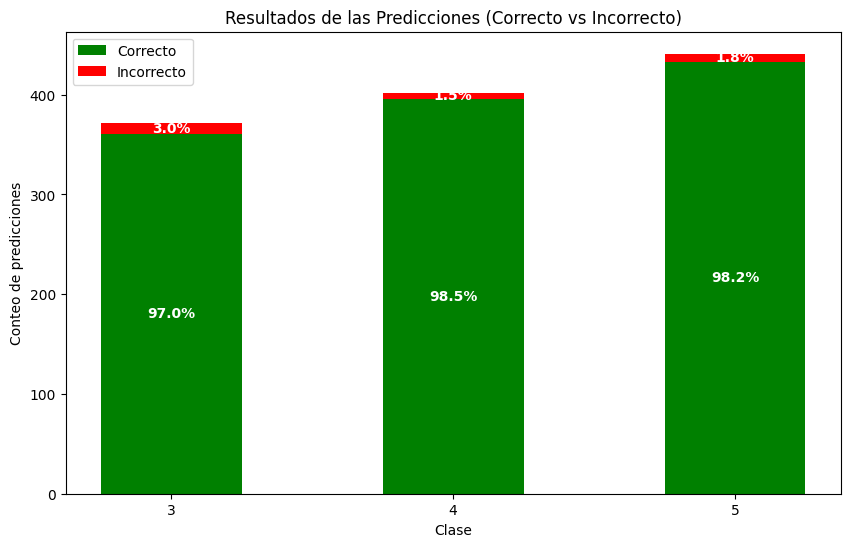

In [ ]:
pred_correct = (y_pred_MNB == y_test_MNB)
pred_incorrect = (y_pred_MNB != y_test_MNB)

classes = np.unique(y_test_MNB)

correct_counts = []
incorrect_counts = []

for class_value in classes:
    correct_counts.append(np.sum((y_test_MNB == class_value) & pred_correct))
    incorrect_counts.append(np.sum((y_test_MNB == class_value) & pred_incorrect))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.5
indices = np.arange(len(classes))

bars1 = ax.bar(indices, correct_counts, bar_width, label='Correcto', color='g')
bars2 = ax.bar(indices, incorrect_counts, bar_width, bottom=correct_counts, label='Incorrecto', color='r')

ax.set_xlabel('Clase')
ax.set_ylabel('Conteo de predicciones')
ax.set_title('Resultados de las Predicciones (Correcto vs Incorrecto)')
ax.set_xticks(indices)
ax.set_xticklabels(labels=["3", "4", "5"])
ax.legend()

for i in range(len(classes)):
    total = correct_counts[i] + incorrect_counts[i]
    if total > 0:
        correct_pct = (correct_counts[i] / total) * 100
        incorrect_pct = (incorrect_counts[i] / total) * 100

        ax.text(indices[i], correct_counts[i] / 2, f'{correct_pct:.1f}%',
                ha='center', va='center', color='white', fontweight='bold')

        ax.text(indices[i], correct_counts[i] + incorrect_counts[i] / 2,
                f'{incorrect_pct:.1f}%', ha='center', va='center', color='white', fontweight='bold')

plt.show()


Como se puede ver, por cada clase la tasa de prediccion correcta es bastante positiva, por lo que este algoritmo clasifica muy bien en general las 3 clases. Igualmente se pude observar lo siguiente:
1. **Bajas tasas de error (rojo):** Los errores son muy bajos, con solo entre el 1.5% y el 3% de las predicciones siendo incorrectas. Estos pequeños rangos de error sugieren que el modelo tiene buena capacidad predictiva y que las predicciones erróneas son relativamente escasas.

2. **Balance entre clases:** El desempeño del modelo es bastante consistente entre las tres clases. Aunque la clase "3" tiene un error ligeramente mayor (3%), las diferencias en precisión entre las clases no son sustanciales.

Ahora intentemos interpretar la matriz de confusion que arroja el algoritmo.

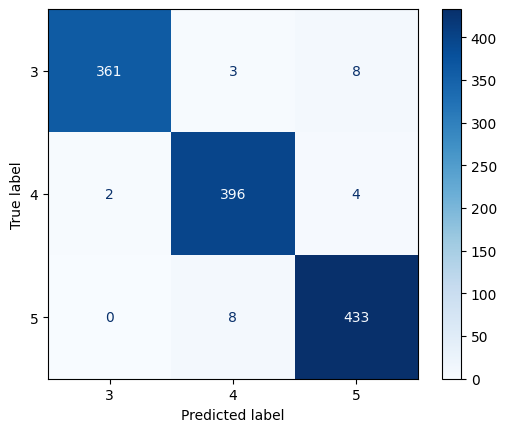

In [ ]:
dispNB = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_MNB, y_pred_MNB), display_labels=["3","4","5"])
dispNB.plot(cmap=plt.cm.Blues)
plt.show()

La matriz de confusion nuevamente nos reconfirma lo que ya suponiamos en la primera grafica de barras apiladas. Se puede observar igualmente, que por clase se esta clasificando correctamente los textos por cada una de las clases. Notese, que por clase, hay un bajo recall y especifidad, que lo vamos a poder ver y explicar mejor en la siguiente grafica.

[0.9704301075268817, 0.9850746268656716, 0.981859410430839]
[0.9944903581267218, 0.972972972972973, 0.9730337078651685]


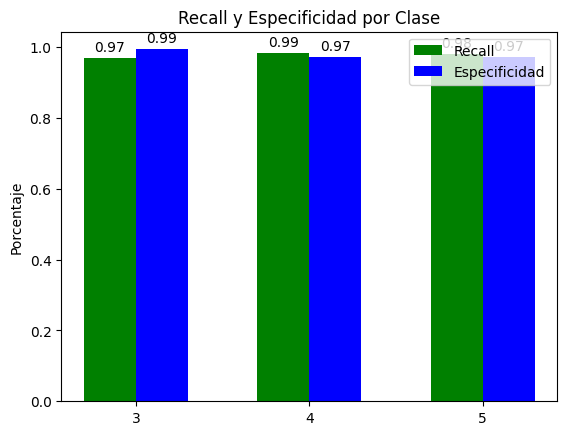

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test_MNB, y_pred_MNB, target_names=["3", "4", "5"], output_dict=True)

sensitivity = [report[str(i)]['recall'] for i in [3, 4, 5]]
specificity = [report[str(i)]['precision'] for i in [3, 4, 5]]
x = np.arange(len(sensitivity))
width = 0.3

fig, ax = plt.subplots()
bars_sensitivity = ax.bar(x - width/2, sensitivity, width, label='Recall', color='g')
bars_specificity = ax.bar(x + width/2, specificity, width, label='Especificidad', color='b')

ax.set_ylabel('Porcentaje')
ax.set_title('Recall y Especificidad por Clase')
ax.set_xticks(x)
ax.set_xticklabels(["3", "4", "5"])
ax.legend()

for bar in bars_sensitivity:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

for bar in bars_specificity:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')


plt.show()


Ambas métricas son altas para una clase, significa que el modelo tiene un excelente desempeño para cada clase, identificando correctamente tanto los verdaderos positivos como los verdaderos negativos.

Ejemplo de interpretación:

* **Clase 3:** Significa que el modelo está reconociendo correctamente el 97% de los ejemplos de la clase 3, pero está clasificando erróneamente el 1% de los ejemplos de otras clases como si fueran de la clase 3.

* **Clase 4**: Significa que el modelo está reconociendo correctamente el 99% de los ejemplos de la clase 4, pero está clasificando erróneamente el 3% de los ejemplos de otras clases como si fueran de la clase 4.

* **Clase 5:** Al igual que las clases anteriores, el 98% de las clases de tipo 5 son correctamente identificadas, mientras que solo el 3% de  los ejemplos de otras clases como si fueran de la clase 5.

En general, la clasificacion es bastante buena, ya que el porcentaje de error de clasificacion es muy bajo, donde el maximo error que se puede percibir es solo de un 3% que concuerda con lo concluido en la grafica de barras apiladas

## 4.4 Predicciones sobre el archivo Excel

In [ ]:
df_excel = pd.read_excel('/content/TestODScat_345.xlsx')
print(df_excel.head(5))

In [ ]:
df_t = df_excel.copy()

In [ ]:
df_t["Textos_espanol"] = df_t["Textos_espanol"].apply(contractions.fix)

In [ ]:
df_t.head(5)

Luego se realiza la tokenización de las palabras en una nueva columna

In [ ]:
df_t["palabras"] = df_t["Textos_espanol"].apply(word_tokenize)

In [ ]:
df_t.sample(5)

In [ ]:
df_t.shape

Luego de esto se realiza el pre-procesamiento donde se elimina el ruido

In [ ]:
df_t["palabras_preprocesadas"] = df_t["palabras"].apply(preprocessing)

In [ ]:
df_t = df_t.drop(columns=["Textos_espanol","palabras"], axis=1)

In [ ]:
df_t.head(5)

## Normalización

Ahora se eliminan los prefijos y sufijos y tambien se realiza una lematización. Esto se hace solo para los verbos.

In [ ]:
df_n = df_t.copy()

In [ ]:
df_n = df_n.rename(columns={"palabras_preprocesadas":"palabras"})

In [ ]:
df_n["palabras"] = df_n["palabras"].apply(stem_and_lemmatize)

In [ ]:
df_n.head(5)

## Selección de campos

In [ ]:
df_n["palabras"] = df_n["palabras"].apply(lambda x: " ".join(map(str, x)))

In [ ]:
df_n = df_n.rename(columns={"palabras":"Textos_espanol"})

In [ ]:
df_n["Textos_espanol"].head(50)

In [ ]:
X_nuevos_textos = df_n['Textos_espanol']

In [ ]:
X_nuevos_textos_tfidf = tfidf_vectorizer.transform(X_nuevos_textos)

In [ ]:
X_nuevos_textos_tfidf_denso = X_nuevos_textos_tfidf.toarray()

In [ ]:
predicciones_sdg = best_svc_model.predict(X_nuevos_textos_tfidf_denso)

In [ ]:
df_excel['sdg'] = predicciones_sdg
print(df_excel.head())


In [ ]:
df_excel.to_excel('/content/TestODScat_345-Predicted.xlsx', index=False)
print("Archivo Excel guardado con las predicciones en la columna 'sdg'.")


# Sección 5. Mapa de actores relacionado con el producto de datos creado

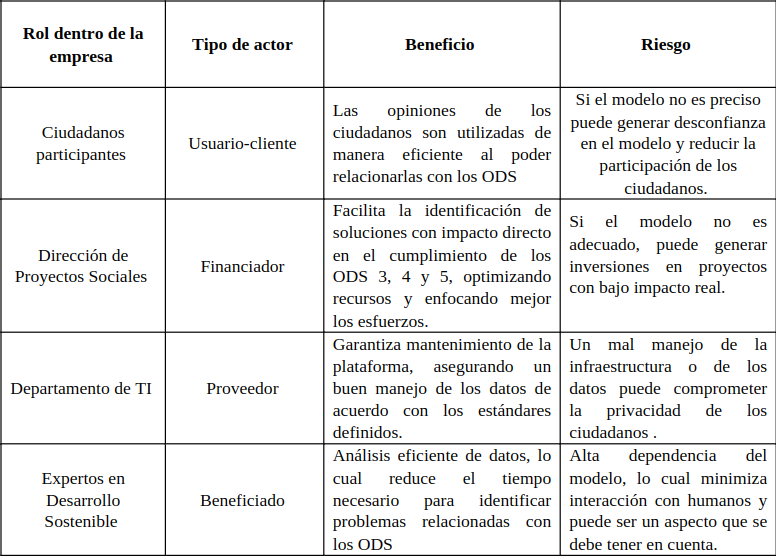

# Sección 7. Trabajo en equipo

- **Danny Camilo Muñoz :**
  - **Roles**: Líder de analítica
  - **Tareas realizadas**:
  - **Algoritmo trabajado**:
  - **Retos**:
  - **Formas para resolver retos**:

- **Johan Alexis Bautista :**
  - **Roles**: Líder del proyecto
  - **Tareas realizadas**:
  - **Algoritmo trabajado**: SVG
  - **Retos**:
  - **Formas para resolver retos**:

- **Juan Camilo López :**
  - **Roles**: Líder de negocio y líder de datos
  - **Tareas realizadas**: Entendimiento y preparacion de datos
  - **Algoritmo trabajado**: K-Nearest Neighbors
  - **Retos**:
  - **Formas para resolver retos**: